In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [4]:
bank = pd.read_csv("D:/Data Science/Assignments/6 Logistic Regression/bank-full 1.csv",sep=';')
bank.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


<AxesSubplot:xlabel='y', ylabel='count'>

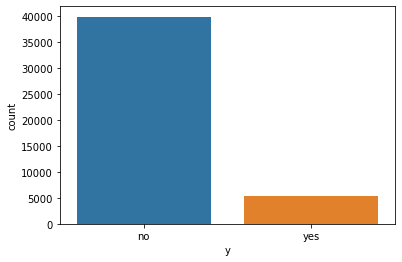

In [6]:
sns.countplot(x='y',data=bank)

<AxesSubplot:ylabel='Frequency'>

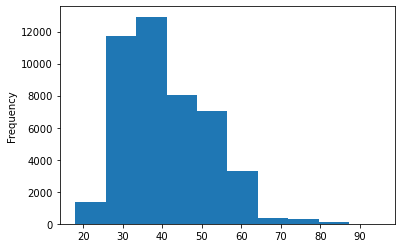

In [8]:
bank['age'].plot.hist()

<AxesSubplot:xlabel='loan', ylabel='count'>

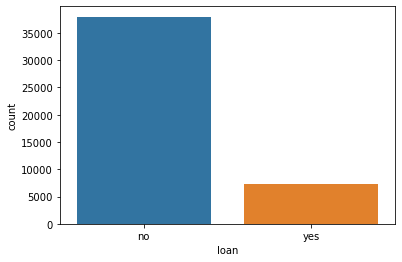

In [9]:
sns.countplot(x='loan',data=bank)

In [11]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.1+ MB


In [12]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [13]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [16]:
bank['job']=le.fit_transform(bank['job'])
bank['marital']=le.fit_transform(bank['marital'])
bank['education']=le.fit_transform(bank['education'])
bank['housing']=le.fit_transform(bank['housing'])
bank['loan']=le.fit_transform(bank['loan'])
bank['month']=le.fit_transform(bank['month'])
bank['default']=le.fit_transform(bank['default'])
bank['y']=le.fit_transform(bank['y'])

In [18]:
bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,unknown,5,8,261,1,-1,0,unknown,0
1,44,9,2,1,0,29,1,0,unknown,5,8,151,1,-1,0,unknown,0
2,33,2,1,1,0,2,1,1,unknown,5,8,76,1,-1,0,unknown,0
3,47,1,1,3,0,1506,1,0,unknown,5,8,92,1,-1,0,unknown,0
4,33,11,2,3,0,1,0,0,unknown,5,8,198,1,-1,0,unknown,0
5,35,4,1,2,0,231,1,0,unknown,5,8,139,1,-1,0,unknown,0
6,28,4,2,2,0,447,1,1,unknown,5,8,217,1,-1,0,unknown,0
7,42,2,0,2,1,2,1,0,unknown,5,8,380,1,-1,0,unknown,0
8,58,5,1,0,0,121,1,0,unknown,5,8,50,1,-1,0,unknown,0
9,43,9,2,1,0,593,1,0,unknown,5,8,55,1,-1,0,unknown,0


In [20]:
bank.drop(['contact','poutcome'],axis=1,inplace=True)

In [22]:
bank.head(6)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,4,1,2,0,2143,1,0,5,8,261,1,-1,0,0
1,44,9,2,1,0,29,1,0,5,8,151,1,-1,0,0
2,33,2,1,1,0,2,1,1,5,8,76,1,-1,0,0
3,47,1,1,3,0,1506,1,0,5,8,92,1,-1,0,0
4,33,11,2,3,0,1,0,0,5,8,198,1,-1,0,0
5,35,4,1,2,0,231,1,0,5,8,139,1,-1,0,0


In [23]:
bank.shape

(45211, 15)

In [24]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'y'],
      dtype='object')

In [25]:
x=bank[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous']]
y=bank['y']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size = 0.2,random_state=40)

In [28]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()

In [29]:
logmodel.fit(x_train,y_train)

C:\Program Files\data science\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
predictions=logmodel.predict(x_test)

In [31]:
from sklearn.metrics import classification_report

In [32]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.90      0.98      0.94      7976\n           1       0.56      0.18      0.27      1067\n\n    accuracy                           0.89      9043\n   macro avg       0.73      0.58      0.61      9043\nweighted avg       0.86      0.89      0.86      9043\n'

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
confusion_matrix(y_test,predictions)

array([[7821,  155],
       [ 873,  194]], dtype=int64)

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(y_test,predictions)

0.8863209112020347